<a href="https://colab.research.google.com/github/Deepachowdhari/MyProjects/blob/main/AutismPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


In [2]:
#Data
df=pd.read_csv("/content/train (2).csv")

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.shape

(800, 22)

In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [4]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#convert age into integer
df['age']=df['age'].astype(int)

In [6]:
df['age'].head()

,age
0,38.172746
1,47.750517
2,7.380373
3,23.561927
4,43.205790


In [7]:
for col in df.columns:
  numerical_features=['ID','age','result']
  if col not in numerical_features:
    print(col,df[col].unique())
    print('------'*50)


A1_Score [1 0]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
A2_Score [0 1]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
A3_Score [1 0]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
A4_Score [0 1]
-------------------------------------

In [8]:
#dropping age_desc and ID column
df=df.drop(columns=['ID','age_desc'])

In [9]:
df.shape

(800, 20)

In [10]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [11]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [12]:
#mapping
mapping={'Viet Nam':"Vietnam",
         'AmericanSamoa':"USA",
         'Hong Kong':"China"}

df['contry_of_res']=df['contry_of_res'].replace(mapping)

In [13]:
#target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [14]:
#EDA
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [15]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


Mean: 28.452117626575
Median: 24.848350449999998


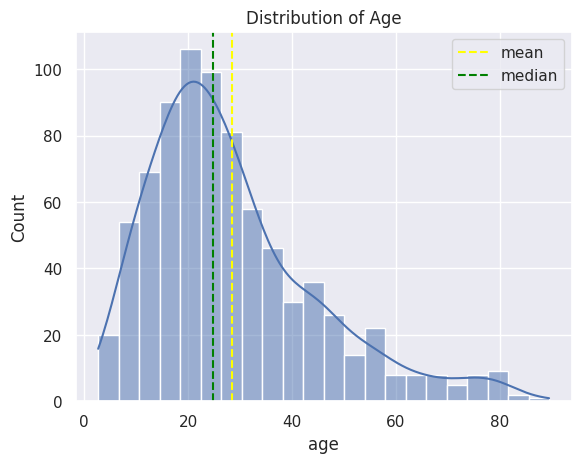

In [16]:
#Univariate analysis
#Numerical columns:age,result

sns.set_theme(style="darkgrid")
sns.histplot(df['age'],kde=True)
plt.title("Distribution of Age")

age_mean=df['age'].mean()
age_median=df['age'].median()

print("Mean:",age_mean)
print("Median:",age_median)

plt.axvline(age_mean,color='yellow',linestyle='--',label="mean")
plt.axvline(age_median,color='green',linestyle='--',label="median")
plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


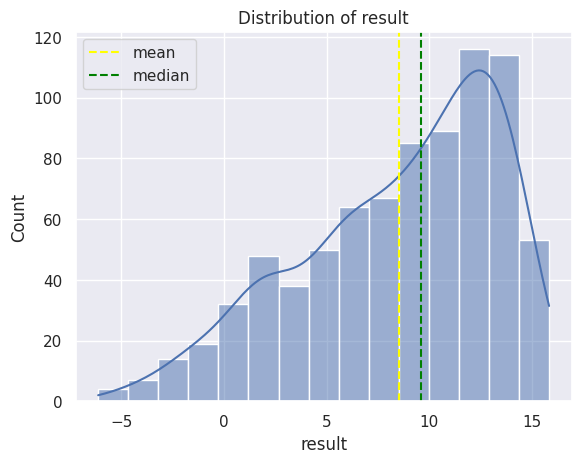

In [17]:
sns.set_theme(style="darkgrid")
sns.histplot(df['result'],kde=True)
plt.title("Distribution of result")

result_mean=df['result'].mean()
result_median=df['result'].median()

print("Mean:",result_mean)
print("Median:",result_median)

plt.axvline(result_mean,color='yellow',linestyle='--',label="mean")
plt.axvline(result_median,color='green',linestyle='--',label="median")
plt.legend()

plt.show()

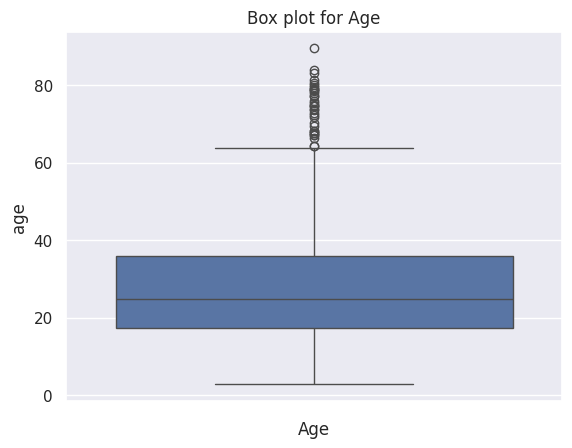

In [18]:
#Outliers
sns.boxplot(df['age'])
plt.title("Box plot for Age")
plt.xlabel("Age")
plt.show()

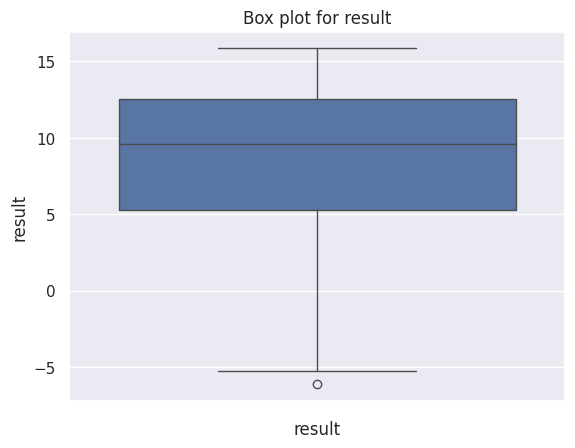

In [19]:
sns.boxplot(df['result'])
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [20]:
#count the outliers using IQR method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df['age']<lower_bound)|(df['age']>upper_bound)]



In [21]:
len(age_outliers)

35

In [22]:
Q1=df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df['result']<lower_bound)|(df['result']>upper_bound)]


In [23]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62.382337,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [24]:
len(result_outliers)

1

In [25]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

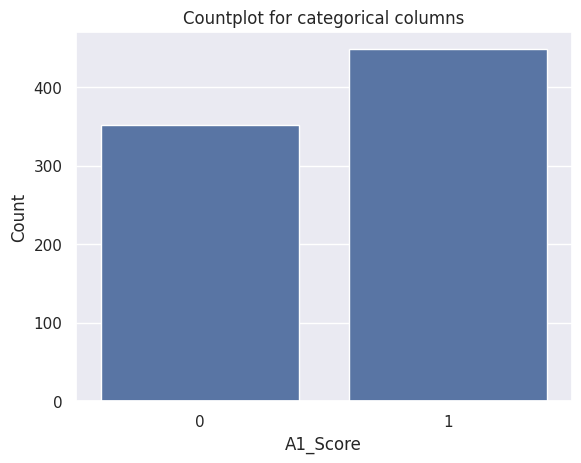

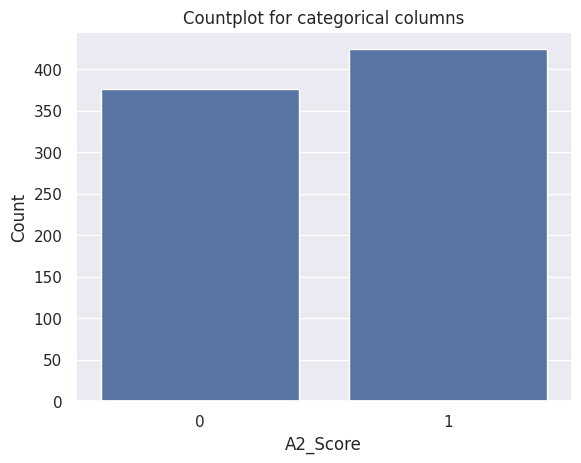

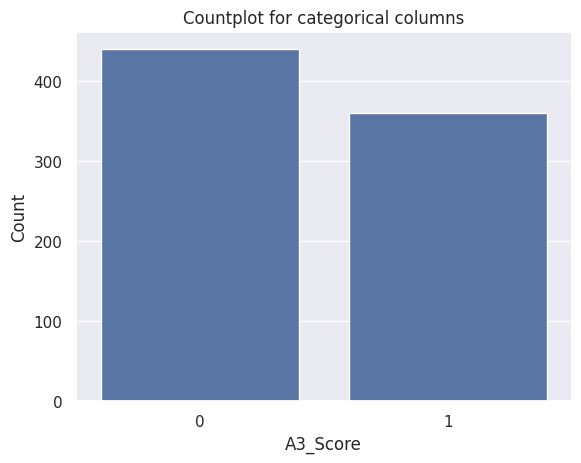

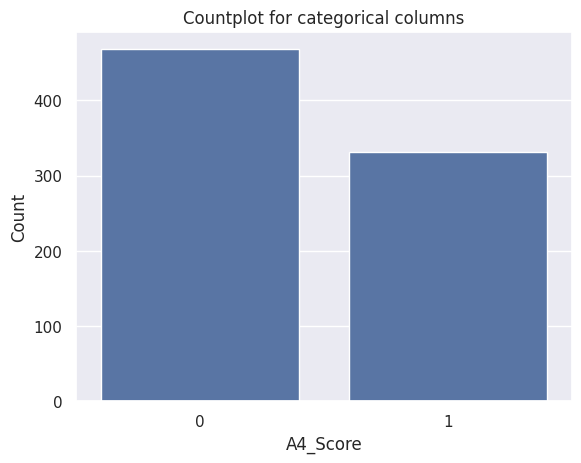

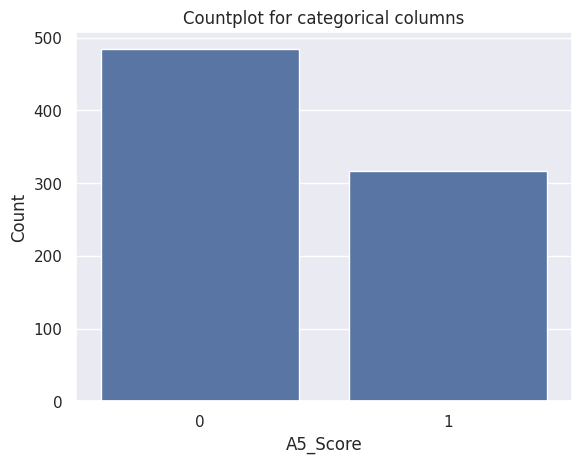

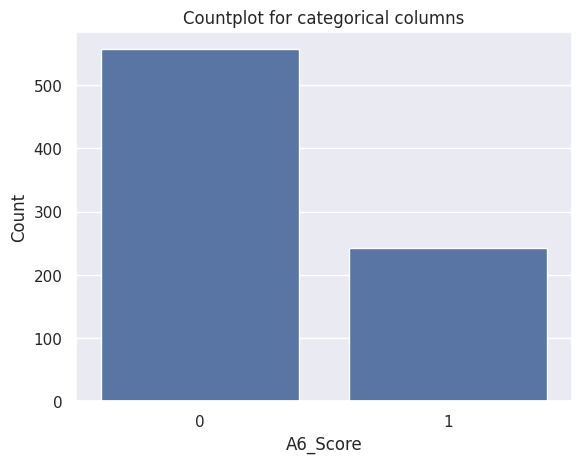

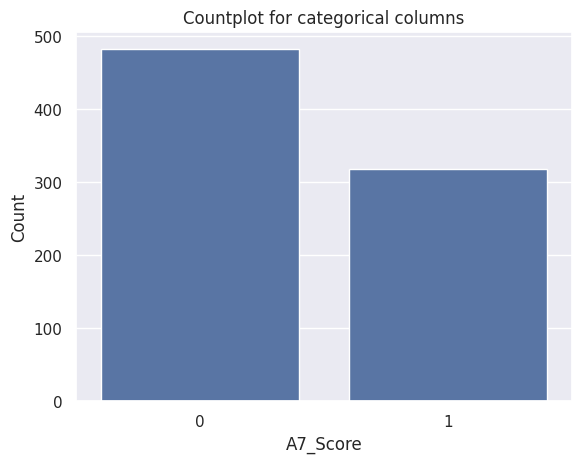

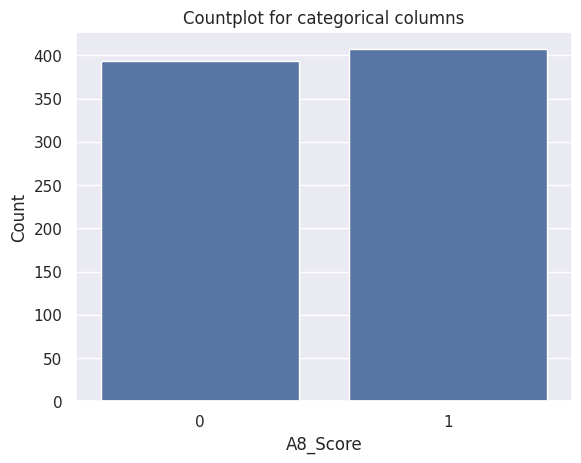

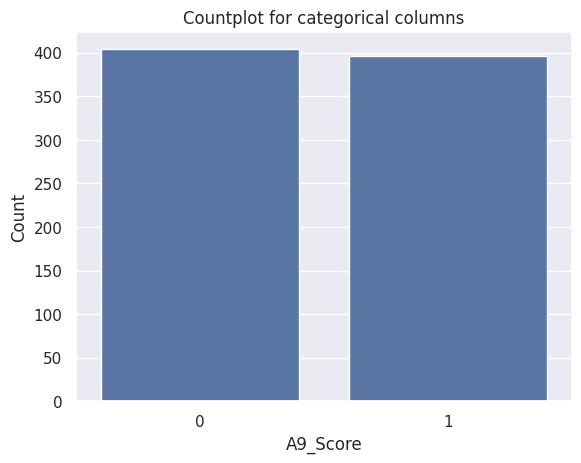

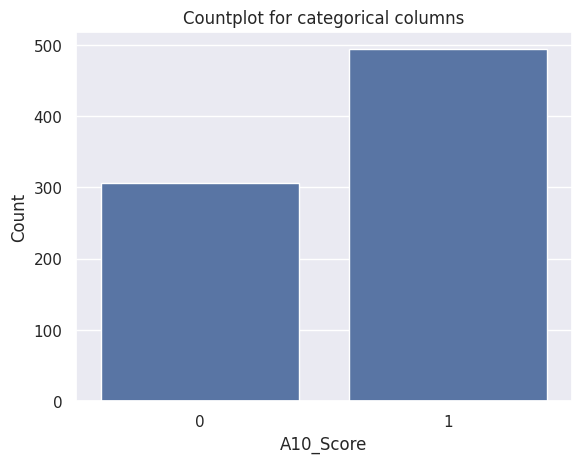

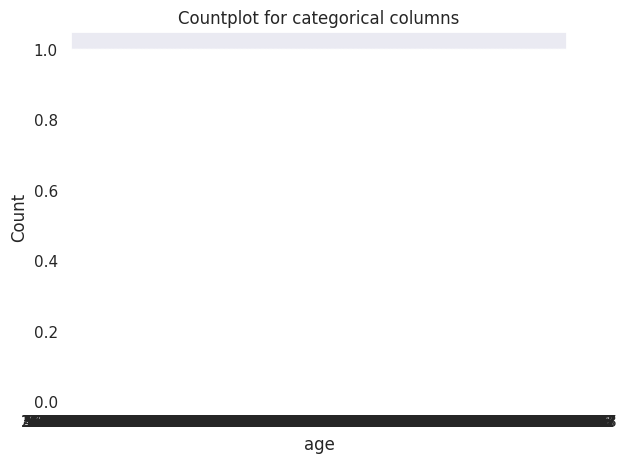

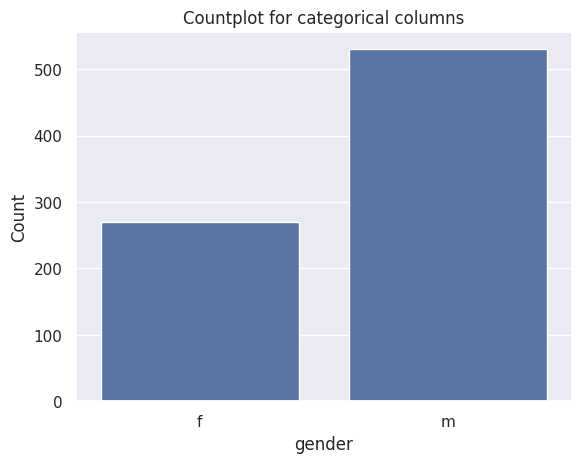

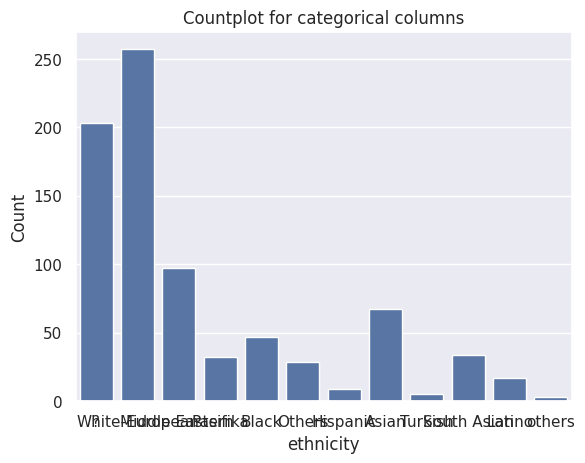

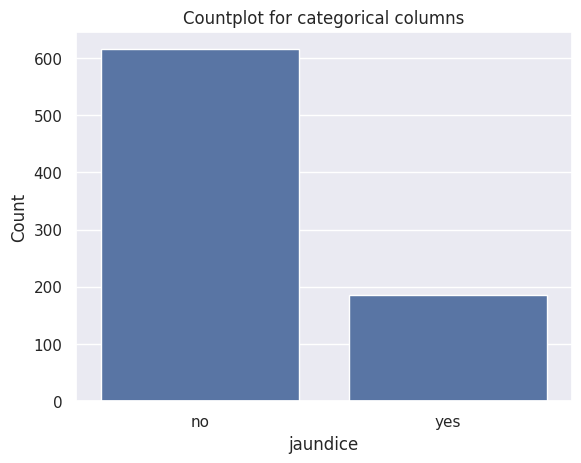

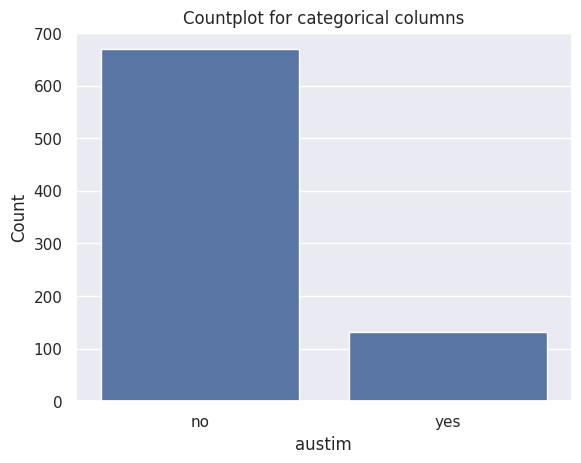

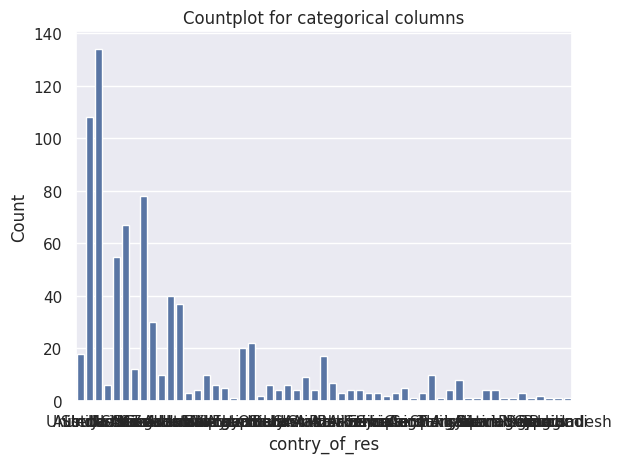

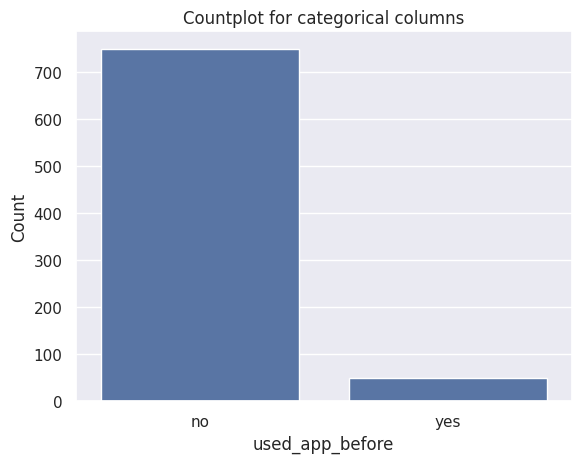

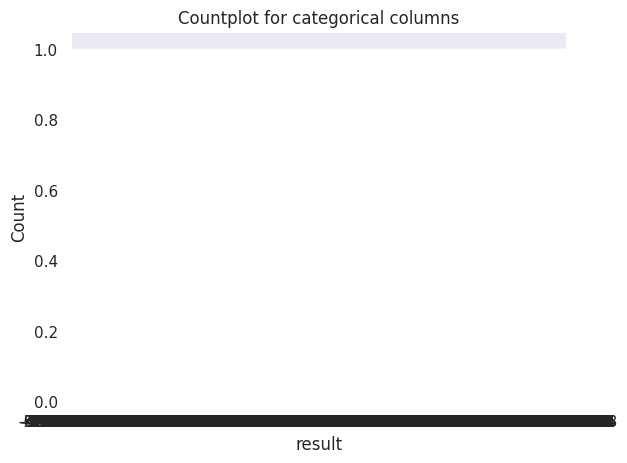

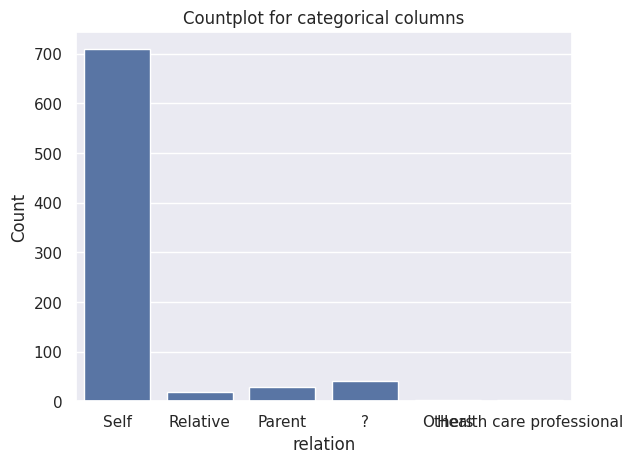

In [26]:
#Univariate Analysis of Categorical columns
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title("Countplot for categorical columns")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


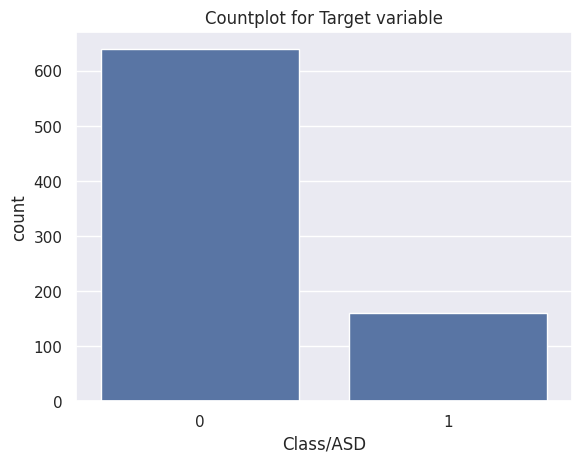

In [27]:
sns.countplot(x=df['Class/ASD'])
plt.title("Countplot for Target variable")
plt.xlabel("Class/ASD")
plt.show()

In [28]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [29]:
#Handle Missing values in ethnicity and relation column
df['ethnicity']=df['ethnicity'].replace({'?':"Others",'others':"Others"})

In [30]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [31]:
df['relation']=df['relation'].replace({'?':"Others",
                                      'Relative':"Others",
                                       'Parent':"Others",
                                       'Health care professional': "Others"})

In [32]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [33]:
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [34]:
#label encoding
df.dtypes


,0
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [35]:
#Identify object column datatypes.
object_columns=df.select_dtypes(include=['object']).columns

In [36]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [37]:
encoders={}
for col in object_columns:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)


In [38]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [39]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


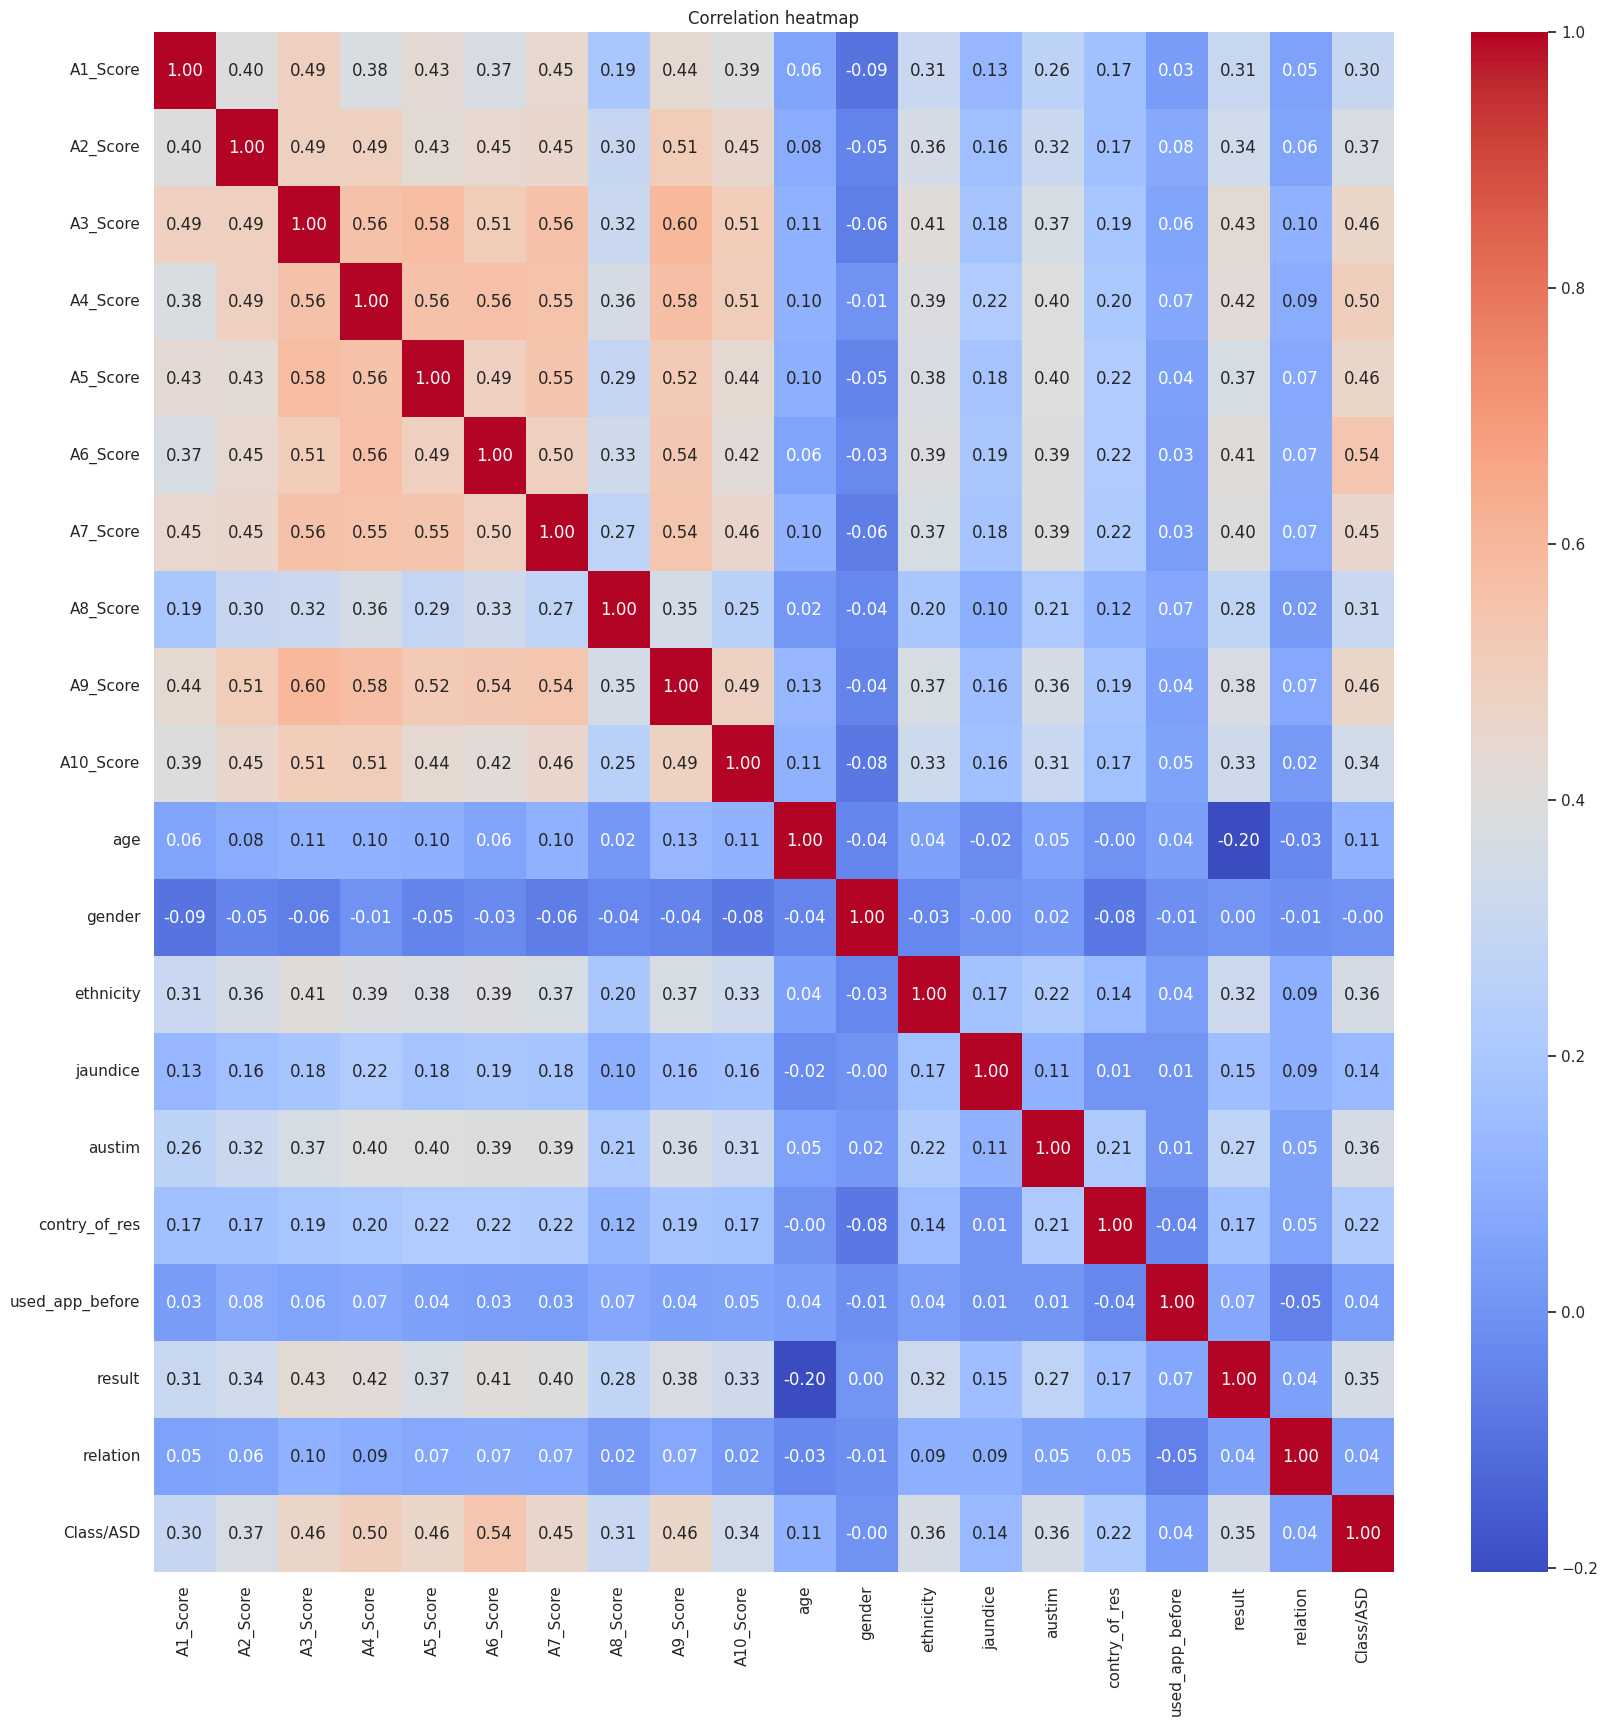

In [40]:
#Bivariate Analysis
#Correlation or Heat Map
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatmap")
plt.show()




In [41]:
#Insights from EDA
#There are few outliers in numerical columns
#There is a class imbalance in target variable
#Thers is a class imbalance in categorical vaiables
#No highly correlated columns
#performed label encoding

In [42]:
#Data preprocessing
#handling outliers
#replace with median

def replace_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  median=df[column].median()
  df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
  return df

In [43]:
df=replace_outliers(df,"age")

In [44]:
df=replace_outliers(df,"result")

In [45]:
df.shape

(800, 20)

In [46]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


In [47]:
#Train Test Split
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [48]:
X=df.drop(columns='Class/ASD')
y=df['Class/ASD']

In [49]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,53,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,53,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,1,2,0,0,34,0,12.999501,1
796,0,1,1,0,0,1,0,1,1,1,20.703001,1,9,0,0,16,0,13.561518,1
797,0,0,0,0,0,0,0,0,0,0,5.711481,1,7,1,0,34,0,2.653177,1
798,0,0,0,0,0,0,0,0,0,0,16.414305,0,5,0,0,14,0,9.069342,1


In [50]:
y

,Class/ASD
0,0
1,0
2,1
3,0
4,0
...,...
795,0
796,0
797,0
798,0


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train.shape,X_test.shape

((640, 19), (160, 19))

In [53]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [54]:
#SMOTE
smote=SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [55]:
X_train_smote.shape,y_train_smote.shape

((1030, 19), (1030,))

In [56]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


In [57]:
#Model Training
models={
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


In [58]:
print(models)

{'DecisionTree': DecisionTreeClassifier(random_state=42), 'RandomForest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [59]:
#Dictionary to store the cross validation score
cv_scores={}

for model_name,model in models.items():
  print(f"Training {model_name} with parametrs..")
  cv_score=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='accuracy')
  cv_scores[model_name]=cv_score.mean()
  print(f"{model_name} cross_validation_score: {cv_scores}")
  print("-"*50)

Training DecisionTree with parametrs..
DecisionTree cross_validation_score: {'DecisionTree': 0.8689320388349515}
--------------------------------------------------
Training RandomForest with parametrs..
RandomForest cross_validation_score: {'DecisionTree': 0.8689320388349515, 'RandomForest': 0.9106796116504853}
--------------------------------------------------
Training XGBoost with parametrs..
XGBoost cross_validation_score: {'DecisionTree': 0.8689320388349515, 'RandomForest': 0.9106796116504853, 'XGBoost': 0.9077669902912622}
--------------------------------------------------


In [60]:
#Hyperparameter tuning and Model selection
decision_tree=DecisionTreeClassifier(random_state=42)
RandomForestClassifier=RandomForestClassifier(random_state=42)
XGBoost=XGBClassifier(random_state=42)

In [61]:
#Hyperparamters
param_grid_dt={
        "criterion":["gini","entropy"],
        "max_depth":[None,5,10,15],
        "min_samples_split":[2,5,10],
        "min_samples_leaf":[1,2,4]
    }

param_grid_rf={
        "n_estimators":[100,150,200,500],
        "max_depth":[None,5,10,15],

      }

param_grid_XGB={
        "n_estimators":[100,150,200,500],
        "max_depth":[3,5,7,9],
        "learning_rate":[0.01,0.1,0.2]
      }

In [62]:
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_searcch_rf=RandomizedSearchCV(estimator=RandomForestClassifier,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=XGBoost,param_distributions=param_grid_XGB,n_iter=20,cv=5,scoring="accuracy",random_state=42)

In [65]:
random_search_dt.fit(X_train_smote,y_train_smote)
random_searcch_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 150, 200, 500]},
                   random_state=42, scoring='accuracy')

In [66]:
print(random_search_dt.best_estimator_)
print(random_searcch_rf.best_estimator_)
print(random_search_xgb.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
RandomForestClassifier(n_estimators=150, random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [67]:
print(random_search_dt.best_score_)
print(random_searcch_rf.best_score_)
print(random_search_xgb.best_score_)

0.8728155339805823
0.9135922330097088
0.9126213592233011


In [68]:
#Get the model with best score
best_model=None
best_score=0
if random_search_dt.best_score_ >best_score:
  best_score=random_search_dt.best_score_
  best_model=random_search_dt.best_estimator_
  print(best_score,best_model)

if random_searcch_rf.best_score_ >best_score:
  best_score=random_searcch_rf.best_score_
  best_model=random_searcch_rf.best_estimator_
  print(best_score,best_model)

if random_search_xgb.best_score_ >best_score:
  best_score=random_search_xgb.best_score_
  best_model=random_search_xgb.best_estimator_
  print(best_score,best_model)

0.8728155339805823 DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.9135922330097088 RandomForestClassifier(n_estimators=150, random_state=42)


In [69]:
print(f"Best Model:{best_model}")
print(f"Best Score:{best_score}")

Best Model:RandomForestClassifier(n_estimators=150, random_state=42)
Best Score:0.9135922330097088


In [70]:
#save the model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [72]:
#evaluate the model on test data
y_test_pred=best_model.predict(X_test)
print("Classification Report:" ,classification_report(y_test,y_test_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_test_pred))
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

Confusion Matrix: [[108  16]
 [ 11  25]]
Accuracy: 0.83125
